In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import math
import matplotlib.pyplot as plt
import numpy as np
import io
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/spotify_songs-2.csv'
df2 = pd.read_csv(url)

In [3]:
#url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/Emotion_Labels.csv'
#df3 = pd.read_csv(url)

In [4]:
#df4 = pd.merge(df2,df3,on='track_id')
#df4 = df2.drop(['Unnamed: 19'], axis=1)
df4=df2

In [5]:
df4 = df4.dropna()
df4.shape

(1099, 19)

In [6]:
df4['playlist_id'].value_counts()

4hKPJNFIhdAg4pAksn78FJ    11
3ykXidKLz1eYPvuGoFlD1e    11
5jROYSZSL7cO0jGAqkPx7C    10
1qXg9ck25tBRxeXsj8mbDG    10
4NlAd9NpIa92IjErMyAriM    10
                          ..
37i9dQZF1DWSTc9FdySHtz     1
2v41efarffe6iY8qpMK5Gj     1
6Ylmweq4pT7j3ScIv5uq1c     1
5wONX0lVyQE5XTxqjTUiUd     1
0COM4nZqdXC3sMjVdcaU7V     1
Name: playlist_id, Length: 359, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df11 = df2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
cols = ['language', 'playlist_genre']
#df11[cols] = df11[cols].apply(LabelEncoder().fit_transform)

df12 = df2.set_index('track_name')

In [8]:
testdf = df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]
testdf1 =  df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C'])]
testdf2 = df4[df4['playlist_id'].isin(['3ykXidKLz1eYPvuGoFlD1e'])]
testdf3 = df4[df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ'])]

In [9]:
testdf1_1 = testdf1.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf2_1 = testdf2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf3_1 = testdf3.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)

In [10]:
df5 = df4[~df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df5 = df4.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
df5['emotion'] = df5['emotion'].astype(int)

In [13]:
df5.head(2)

,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,language,emotion
0,41,rock,0.682,0.401,2,-10.068,1,0.0236,0.2790,0.01170,0.0887,0.566,97.091,tl,6
1,28,rock,0.303,0.880,9,-4.739,1,0.0442,0.0117,0.00994,0.3470,0.404,135.225,en,1


In [14]:
cols = ['language', 'playlist_genre']
df5[cols] = df5[cols].apply(LabelEncoder().fit_transform)

In [15]:
df11 = df5

In [16]:
df11['track_name'] = df4['track_name']
df5 = df5.drop(['track_name'], axis=1)

In [17]:
df11.iloc[517,15]

'Bandito'

In [18]:
df12 = df11.set_index('track_name')

In [19]:
testdf1_1[cols] = testdf1_1[cols].apply(LabelEncoder().fit_transform)
testdf2_1[cols] = testdf2_1[cols].apply(LabelEncoder().fit_transform)
testdf3_1[cols] = testdf3_1[cols].apply(LabelEncoder().fit_transform)

In [20]:
X, y = df5.iloc[:, :-1], df5.iloc[:, -1]
X.shape

(1099, 14)

In [21]:
#strategy = {1:200, 2:120, 3:150, 4:100, 5:150,6:120, 7:70, 8:45 ,9:45 ,10:40}
#oversample = SMOTE(sampling_strategy=strategy)
#X, y = oversample.fit_resample(X, y)
# summarize distribution
#counter = Counter(y)
#for k,v in counter.items():
#	per = v / len(y) * 100
#	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
#pyplot.bar(counter.keys(), counter.values())
#pyplot.show()

In [22]:
#df6 = pd.DataFrame(X)
#df6['emotion'] = y
#df7 = df6.sample(frac=1)
#df5 = df5.dropna()

In [23]:
df5.shape
scaler = MinMaxScaler()

In [24]:
df5['emotion'].value_counts()

1     393
6     137
3     108
5     103
7      91
2      91
4      67
8      39
10     38
9      32
Name: emotion, dtype: int64

In [25]:
train_data_001 = df5.iloc[:1024,6:14]
train_data_01 = pd.DataFrame(scaler.fit_transform(train_data_001))
train_data_length = len(train_data_01)
train_data_001.columns

Index(['mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'language'],
      dtype='object')

In [26]:
testdf1_2 = testdf1_1.iloc[:1024,6:14]
testdf2_2 = testdf2_1.iloc[:1024,6:14]
testdf3_2 = testdf3_1.iloc[:1024,6:14]
df13 = df12.iloc[:1024,6:14]

In [27]:
(train_data_01 < 0).values.any()

False

In [28]:
train_data = torch.tensor(train_data_01.values.astype(np.float32))

In [29]:
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [30]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [31]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [32]:
discriminator = Discriminator()

In [33]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 8),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [34]:
lr = 0.001
num_epochs = 500
loss_function = nn.BCELoss()

In [35]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [36]:
 len(list(train_loader)[0][0])

32

In [37]:
# list for final generated samples
final_generated_samples=[]
final_generated_samples_list=[]

In [38]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.ones((batch_size, 8))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.ones((batch_size, 8))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            final_generated_samples.append(generated_samples[0])
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            

Epoch: 0 Loss D.: 0.7118852138519287
Epoch: 0 Loss G.: 0.8353325128555298
Epoch: 10 Loss D.: 0.39569172263145447
Epoch: 10 Loss G.: 1.7158923149108887
Epoch: 20 Loss D.: 0.6896534562110901
Epoch: 20 Loss G.: 2.6614151000976562
Epoch: 30 Loss D.: 0.11683958023786545
Epoch: 30 Loss G.: 2.90144944190979
Epoch: 40 Loss D.: 0.23154720664024353
Epoch: 40 Loss G.: 3.7947819232940674
Epoch: 50 Loss D.: 0.0456969253718853
Epoch: 50 Loss G.: 3.796381711959839
Epoch: 60 Loss D.: 0.014768335968255997
Epoch: 60 Loss G.: 7.341174125671387
Epoch: 70 Loss D.: 0.12231793999671936
Epoch: 70 Loss G.: 3.4718666076660156
Epoch: 80 Loss D.: 0.012404769659042358
Epoch: 80 Loss G.: 4.745633602142334
Epoch: 90 Loss D.: 0.012162665836513042
Epoch: 90 Loss G.: 5.603230953216553
Epoch: 100 Loss D.: 0.04859871789813042
Epoch: 100 Loss G.: 4.338864803314209
Epoch: 110 Loss D.: 0.0026917951181530952
Epoch: 110 Loss G.: 7.836730480194092
Epoch: 120 Loss D.: 0.018647922202944756
Epoch: 120 Loss G.: 7.356071472167969
E

In [39]:
# make a dataframe for sample list
for i in final_generated_samples:
  a = i.detach().numpy()
  final_generated_samples_list.append(a)
final_generated_samples_df = pd.DataFrame(final_generated_samples_list)

In [40]:
latent_space_samples[:10]

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

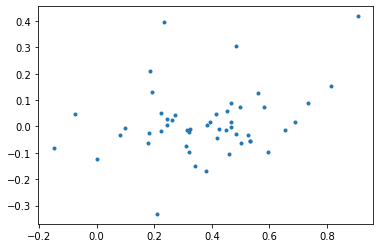

In [41]:
#plot of two variables from generated samples
plt.plot(final_generated_samples_df.iloc[:, 6], 
         final_generated_samples_df.iloc[:, 3], ".")

In [42]:
from scipy.spatial import distance

In [43]:
float_x = real_samples[0].double()

In [44]:
float_x = list(float_x.numpy())

In [45]:
# Cosine similarity
def square_rooted(x):
   return round(math.sqrt(sum([a*a for a in x])),3)
  
def cosine_similarity(x,y):
 numerator = sum(a*b for a,b in zip(x,y))
 denominator = square_rooted(x)*square_rooted(y)
 return round(numerator/float(denominator),3)
  
print(cosine_similarity(final_generated_samples_df[0],float_x))

0.727


In [46]:
#Jaccard similarity
from math import*
  
def jaccard_similarity(x,y):
 intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
 union_cardinality = len(set.union(*[set(x), set(y)]))
 return intersection_cardinality/float(union_cardinality)
print(jaccard_similarity([0,1,2,5,6],[0,2,3,5,7,9]))

0.375


In [47]:
#jaccard_score(final_generated_samples_df.iloc[0,:].values,float_x)

In [48]:
final_generated_samples_df.iloc[0,:].values

array([1.18917346, 0.63774568, 0.32985011, 0.41770768, 0.13447177,
       0.73320174, 0.90794832, 0.51876456])

In [49]:
real_samples[0]

tensor([1.0000, 0.1387, 0.0607, 0.0000, 0.0862, 0.1900, 0.3491, 0.1667])

In [50]:
final_generated_samples_df.iloc[3,:].values

array([0.73058063, 0.24294734, 0.24463302, 0.07402482, 0.32640105,
       0.50931424, 0.58277905, 0.11605163])

In [51]:
import numpy as np
import pandas as pd
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import pairwise_distances,cosine_similarity

In [52]:
df9 = pd.DataFrame(scaler.inverse_transform(final_generated_samples_df))
df10 = pd.DataFrame(scaler.inverse_transform(train_data_01))

In [53]:
generated_vals2=[]
for i, j in df9.iterrows():
  generated_vals2.append(j.values)

generated_vals3 = generated_vals2[:10]

train_data_vals2=[]
for i, j in train_data_001.iterrows():
  train_data_vals2.append(j.values)


In [54]:
train_data_vals2[517]

array([1.00000e+00, 5.91000e-02, 3.33000e-01, 0.00000e+00, 1.28000e-01,
       4.47000e-01, 1.32097e+02, 8.00000e+00])

In [55]:
generated_vals=[]
for i, j in final_generated_samples_df.iterrows():
  generated_vals.append(j.values)

train_data_vals=[]
for i, j in train_data_01.iterrows():
  train_data_vals.append(j.values)

def cos_similarity(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_idx = df13.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

In [56]:
def euclid_similarity(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_idx = df13.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [57]:
dst = distance.euclidean(final_generated_samples_df.iloc[0,:].values,float_x)
print('Euclidean distance: %.3f' % dst)

Euclidean distance: 1.125


In [58]:
df5.shape

(1099, 15)

In [59]:
# pick recommendations with cosine similarity
for i in generated_vals3:
  a = cos_similarity(i,train_data_vals2)

len train data: 1024 ; index: Jungli Sher ; cos sim: [[0.99997509]]
len train data: 1024 ; index: LUNA ; cos sim: [[0.99975575]]
len train data: 1024 ; index: LUNA ; cos sim: [[0.99998153]]
len train data: 1024 ; index: Gangsta ; cos sim: [[0.99999823]]
len train data: 1024 ; index: Dag 1 ; cos sim: [[0.99998264]]
len train data: 1024 ; index: One For the Money ; cos sim: [[0.99999825]]
len train data: 1024 ; index: Bon Bon Chocolat ; cos sim: [[0.99998746]]
len train data: 1024 ; index: Un autre que moi ; cos sim: [[0.99999095]]
len train data: 1024 ; index: Lento ; cos sim: [[0.99999531]]
len train data: 1024 ; index: It's Goin' Down (feat. Nitti) ; cos sim: [[0.99999557]]


In [60]:
# pick recommendations with euclidean similarity
for i in generated_vals3:
  a = euclid_similarity(i,train_data_vals2)

len train data: 1024 ; index: So Far Down ; euclid sim: 6.385894985936823
len train data: 1024 ; index: Eye of the Tiger ; euclid sim: 5.161335214740489
len train data: 1024 ; index: Bandit ; euclid sim: 2.2462534165478334
len train data: 1024 ; index: so sad ; euclid sim: 1.0619031389860862
len train data: 1024 ; index: LUNA ; euclid sim: 1.2758609560725442
len train data: 1024 ; index: Estamos Arriba ; euclid sim: 1.806956295992934
len train data: 1024 ; index: Full Moon ; euclid sim: 1.8263754727019892
len train data: 1024 ; index: Full Moon ; euclid sim: 1.4631833329267532
len train data: 1024 ; index: Quiero Repetir ; euclid sim: 0.5906540468797985
len train data: 1024 ; index: I Hate Everything About You ; euclid sim: 0.6238521802810176


In [61]:
testdf1_3 = testdf1_2
testdf1_3['track_name'] = testdf1['track_name']
testdf1_3 = testdf1_3.set_index('track_name')

testdf2_3 = testdf2_2
testdf2_3['track_name'] = testdf2['track_name']
testdf2_3 = testdf2_3.set_index('track_name')

testdf3_3 = testdf3_2
testdf3_3['track_name'] = testdf3['track_name']
testdf3_3 = testdf3_3.set_index('track_name')

In [62]:
test_data1 = testdf1_3.values
test_data2 = testdf2_3.values
test_data3 = testdf3_3.values

In [63]:
def cos_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_idx = testdf1_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_idx = testdf1_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [64]:
#compare recomendations to test subjects
for i in generated_vals3:
  a = cos_similarity_t1(i,test_data1)

len train data: 10 ; index: Un autre que moi ; cos sim: [[0.9992351]]
len train data: 10 ; index: Jungle ; cos sim: [[0.99980461]]
len train data: 10 ; index: I Dare You ; cos sim: [[0.99998876]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99996014]]
len train data: 10 ; index: Jungle ; cos sim: [[0.99997779]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99967776]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99845575]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99892022]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99934914]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99965699]]


In [65]:
for i in generated_vals3:
  a = euclid_similarity_t1(i,test_data1)

len train data: 10 ; index: Tainted ; euclid sim: 19.075993557359645
len train data: 10 ; index: Song For You ; euclid sim: 7.407681329914869
len train data: 10 ; index: Un autre que moi ; euclid sim: 7.612242223703082
len train data: 10 ; index: Jungle ; euclid sim: 2.4590248211903165
len train data: 10 ; index: Afternoon ; euclid sim: 1.2568332171745242
len train data: 10 ; index: Love Is a Bitch ; euclid sim: 5.311435630957634
len train data: 10 ; index: Un autre que moi ; euclid sim: 7.9510622079430044
len train data: 10 ; index: Un autre que moi ; euclid sim: 8.573371979588286
len train data: 10 ; index: Un autre que moi ; euclid sim: 5.614672671205947
len train data: 10 ; index: Un autre que moi ; euclid sim: 13.395485589367656


In [66]:
def cos_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_idx = testdf2_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_idx = testdf2_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [69]:
#compare recomendations to test subjects
for i in generated_vals3:
  a = cos_similarity_t2(i,test_data2)

len train data: 11 ; index: She's Playing Hard To Get ; cos sim: [[0.99884426]]
len train data: 11 ; index: End Of The Road ; cos sim: [[0.99979966]]
len train data: 11 ; index: She's Playing Hard To Get ; cos sim: [[0.99999525]]
len train data: 11 ; index: She's Playing Hard To Get ; cos sim: [[0.99989689]]
len train data: 11 ; index: She's Playing Hard To Get ; cos sim: [[0.99998506]]
len train data: 11 ; index: End Of The Road ; cos sim: [[0.99939607]]
len train data: 11 ; index: She's Playing Hard To Get ; cos sim: [[0.997893]]
len train data: 11 ; index: I Adore Mi Amor ; cos sim: [[0.99842022]]
len train data: 11 ; index: End Of The Road ; cos sim: [[0.99895684]]
len train data: 11 ; index: End Of The Road ; cos sim: [[0.9993557]]


In [68]:
for i in generated_vals3:
  a = euclid_similarity_t2(i,test_data2)

len train data: 11 ; index: She's Playing Hard To Get ; euclid sim: 10.822165483063555
len train data: 11 ; index: I'm Dreamin' ; euclid sim: 2.6722091840416002
len train data: 11 ; index: I Adore Mi Amor ; euclid sim: 2.5957766902742656
len train data: 11 ; index: Just Got Paid ; euclid sim: 29.83904545594835
len train data: 11 ; index: Just Got Paid ; euclid sim: 11.62396385474217
len train data: 11 ; index: Just Got Paid ; euclid sim: 32.035599332363276
len train data: 11 ; index: I Adore Mi Amor ; euclid sim: 7.506493904391674
len train data: 11 ; index: I Adore Mi Amor ; euclid sim: 5.947242248080684
len train data: 11 ; index: Tender Lover ; euclid sim: 6.625730908540197
len train data: 11 ; index: I Adore Mi Amor ; euclid sim: 4.502262379448269


In [70]:
def cos_similarity_t3(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_idx = testdf3_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t3(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_idx = testdf3_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [71]:
#compare recomendations to test subjects
for i in generated_vals3:
  a = cos_similarity_t3(i,test_data3)

len train data: 11 ; index: Feel It All Around ; cos sim: [[0.99884398]]
len train data: 11 ; index: On Fire ; cos sim: [[0.999794]]
len train data: 11 ; index: Cool Blue ; cos sim: [[0.99999453]]
len train data: 11 ; index: Cool Blue ; cos sim: [[0.99989176]]
len train data: 11 ; index: Cool Blue ; cos sim: [[0.99998379]]
len train data: 11 ; index: On Fire ; cos sim: [[0.99939159]]
len train data: 11 ; index: Feel It All Around ; cos sim: [[0.99789828]]
len train data: 11 ; index: Cherry ; cos sim: [[0.99841536]]
len train data: 11 ; index: Cherry ; cos sim: [[0.99895261]]
len train data: 11 ; index: Cherry ; cos sim: [[0.99935804]]


In [72]:
for i in generated_vals3:
  a = euclid_similarity_t3(i,test_data3)

len train data: 11 ; index: Cool Blue ; euclid sim: 17.275357931834247
len train data: 11 ; index: Cherry ; euclid sim: 2.3883368688758786
len train data: 11 ; index: On Fire ; euclid sim: 0.7742652747097468
len train data: 11 ; index: Hall & Oates ; euclid sim: 3.7689322508561407
len train data: 11 ; index: Loudspeaker ; euclid sim: 9.95436680406737
len train data: 11 ; index: Hall & Oates ; euclid sim: 5.469739669896662
len train data: 11 ; index: On Fire ; euclid sim: 6.372869601572039
len train data: 11 ; index: On Fire ; euclid sim: 5.368797847244775
len train data: 11 ; index: Anywhere We Go ; euclid sim: 5.138480774650796
len train data: 11 ; index: On Fire ; euclid sim: 6.928981244722612
